### Importacion de librerias 

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns

### Extraer datos

In [53]:
df = pd.read_csv("../data/clean_dataset.csv")
df

,Freedom,Generosity,Happiness_Rank,Country_or_region,Perceptions_of_corruption,GDP_per_capita,Healthy_life_expectancy,Happiness_Score,Social_support,Year,Region
0,0.66557,0.29678,1,Switzerland,0.41978,1.39651,0.94143,7.587,1.34951,2015,Western Europe
1,0.62877,0.43630,2,Iceland,0.14145,1.30232,0.94784,7.561,1.40223,2015,Western Europe
2,0.64938,0.34139,3,Denmark,0.48357,1.32548,0.87464,7.527,1.36058,2015,Western Europe
3,0.66973,0.34699,4,Norway,0.36503,1.45900,0.88521,7.522,1.33095,2015,Western Europe
4,0.63297,0.45811,5,Canada,0.32957,1.32629,0.90563,7.427,1.32261,2015,North America
...,...,...,...,...,...,...,...,...,...,...,...
777,0.55500,0.21700,152,Rwanda,0.41100,0.35900,0.61400,3.334,0.71100,2019,Sub-Saharan Africa
778,0.41700,0.27600,153,Tanzania,0.14700,0.47600,0.49900,3.231,0.88500,2019,Sub-Saharan Africa
779,0.00000,0.15800,154,Afghanistan,0.02500,0.35000,0.36100,3.203,0.51700,2019,Southern Asia
780,0.22500,0.23500,155,Central African Republic,0.03500,0.02600,0.10500,3.083,0.00000,2019,Sub-Saharan Africa


### Entrenamiento de los modelos

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor



# 2. Variables
num_feats = [
    'GDP_per_capita', 'Social_support', 'Healthy_life_expectancy',
    'Freedom', 'Generosity', 'Perceptions_of_corruption'
]
cat_feats = ['Country_or_region', 'Region', 'Year']  # asegúrate de tener Region

X = df[num_feats + cat_feats]
y = df['Happiness_Score']

# 3. Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# 4. Preprocesamiento
numeric_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scale', StandardScaler()),
])

categorical_pipe = OneHotEncoder(handle_unknown='ignore', sparse=False)

preprocessor = ColumnTransformer([
    ('num', numeric_pipe, num_feats),
    ('cat', categorical_pipe, cat_feats),
])

# 5. Pipeline completo
model = Pipeline([
    ('pre', preprocessor),
    ('xgb', XGBRegressor(objective='reg:squarederror', random_state=42))
])

# 6. GridSearchCV
param_grid = {
    'xgb__n_estimators': [100, 300, 500],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.05, 0.1],
    'xgb__subsample': [0.7, 1.0],
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(model, param_grid, cv=cv, scoring='r2', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

print("Best R² en validación:", grid.best_score_)
print("Mejores parámetros:", grid.best_params_)

# 7. Evaluación final
test_r2 = grid.score(X_test, y_test)
print("R² en test:", test_r2)


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

# 1. Cargadf = pd.read_csv('data/happiness_all_years.csv')

# 2. Variables
num_feats = [
    'GDP_per_capita', 'Social_support', 'Healthy_life_expectancy',
    'Freedom', 'Generosity', 'Perceptions_of_corruption'
]
cat_feats = ['Country_or_region', 'Region', 'Year']  # asegúrate de tener 'Region' en el CSV

X = df[num_feats + cat_feats]
y = df['Happiness_Score']

# 3. Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Preprocesamiento
numeric_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scale', StandardScaler()),
])

categorical_pipe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer([
    ('num', numeric_pipe, num_feats),
    ('cat', categorical_pipe, cat_feats),
])

# 5. Pipeline completo
model = Pipeline([
    ('pre', preprocessor),
    ('xgb', XGBRegressor(
        objective='reg:squarederror', random_state=42,
        n_jobs=-1
    ))
])

# 6. GridSearchCV
param_grid = {
    'xgb__n_estimators': [100, 300, 500],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.05, 0.1],
    'xgb__subsample': [0.7, 1.0],
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(
    model, param_grid, cv=cv, scoring='r2', n_jobs=-1, verbose=1
)
grid.fit(X_train, y_train)

print("Best R² en validación:", grid.best_score_)
print("Mejores parámetros:", grid.best_params_)

# 7. Evaluación final
test_r2 = grid.score(X_test, y_test)
print("R² en test:", test_r2)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best R² en validación: 0.8890509350216114
Mejores parámetros: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 500, 'xgb__subsample': 1.0}
R² en test: 0.9027220409696561


In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import shap

# Variables predictoras y objetivo, sin Country_Avg_Happiness
features = [
    'Economic_Health_Index', 'Social_support', 'Freedom', 'Perceptions_of_corruption_boxcox',
    'Country_Avg_Perceptions_of_corruption_boxcox', 'Region_Avg_Happiness',
    'Region_Avg_Perceptions_of_corruption_boxcox', 'Economic_Social_Interaction'
]
X = df[features]
y = df['Happiness_Score']

# Confirmar columnas
print("Columnas en X:", X.columns.tolist())

# División de los datos (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
print("Tamaño entrenamiento:", X_train.shape, "Tamaño prueba:", X_test.shape)

# Modelos de regresión
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42)
}

# Parámetros para optimización
param_grids = {
    'Ridge Regression': {'alpha': [0.1, 1.0, 10.0]},
    'Lasso Regression': {'alpha': [0.001, 0.01, 0.1]},
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [10, 20], 'min_samples_split': [2, 5]},
    'Gradient Boosting': {'n_estimators': [100, 200], 'max_depth': [3, 5], 'learning_rate': [0.01, 0.1]},
    'XGBoost': {'n_estimators': [100, 200], 'max_depth': [3, 5], 'learning_rate': [0.01, 0.1]}
}

# Almacenar modelos ajustados
fitted_models = {}

# Evaluar modelos
results = []

for name, model in models.items():
    # Optimizar hiperparámetros (excepto Linear Regression)
    if name != 'Linear Regression':
        grid_search = GridSearchCV(model, param_grids.get(name, {}), cv=5, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        fitted_model = grid_search.best_estimator_
        print(f"{name} - Mejores hiperparámetros: {grid_search.best_params_}")
    else:
        model.fit(X_train, y_train)
        fitted_model = model
    
    # Almacenar modelo ajustado
    fitted_models[name] = fitted_model
    
    # Predicciones
    y_train_pred = fitted_model.predict(X_train)
    y_test_pred = fitted_model.predict(X_test)
    
    # Métricas
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_test = mean_absolute_error(y_test, y_test_pred)
    
    # Validación cruzada (5-fold) en entrenamiento
    cv_scores = cross_val_score(fitted_model, X_train, y_train, cv=5, scoring='r2')
    r2_cv = cv_scores.mean()
    
    results.append({
        'Modelo': name,
        'R² Train': round(r2_train, 4),
        'R² Test': round(r2_test, 4),
        'R² CV (Train)': round(r2_cv, 4),
        'RMSE Train': round(rmse_train, 4),
        'RMSE Test': round(rmse_test, 4),
        'MAE Test': round(mae_test, 4)
    })
    
    # Importancia de características o coeficientes
    if name in ['Random Forest', 'Gradient Boosting', 'XGBoost']:
        importances = pd.Series(fitted_model.feature_importances_, index=X.columns)
        print(f"\nImportancia de características ({name}):\n", importances.sort_values(ascending=False))
    elif name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression']:
        coefs = pd.Series(fitted_model.coef_, index=X.columns)
        print(f"\nCoeficientes ({name}):\n", coefs.sort_values(ascending=False))

# Mostrar resultados
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='R² Test', ascending=False).reset_index(drop=True)
print("\nResultados de los Modelos (sin Country_Avg_Happiness):")
print(results_df.to_string(index=False))

# Comparar con resultados originales
print("\nResultados Originales (con Country_Avg_Happiness):")
original_results = [
    {'Modelo': 'Lasso Regression', 'R² Train': 0.9643, 'R² Test': 0.9676, 'R² CV (Train)': 0.9634, 'RMSE Train': 0.2135, 'RMSE Test': 0.2011, 'MAE Test': 0.1415},
    {'Modelo': 'Linear Regression', 'R² Train': 0.9651, 'R² Test': 0.9669, 'R² CV (Train)': 0.9621, 'RMSE Train': 0.2113, 'RMSE Test': 0.2034, 'MAE Test': 0.1442},
    {'Modelo': 'Ridge Regression', 'R² Train': 0.9651, 'R² Test': 0.9669, 'R² CV (Train)': 0.9623, 'RMSE Train': 0.2113, 'RMSE Test': 0.2032, 'MAE Test': 0.1442},
    {'Modelo': 'XGBoost', 'R² Train': 0.9815, 'R² Test': 0.9646, 'R² CV (Train)': 0.9547, 'RMSE Train': 0.1540, 'RMSE Test': 0.2103, 'MAE Test': 0.1509},
    {'Modelo': 'Gradient Boosting', 'R² Train': 0.9835, 'R² Test': 0.9634, 'R² CV (Train)': 0.9533, 'RMSE Train': 0.1453, 'RMSE Test': 0.2137, 'MAE Test': 0.1523},
    {'Modelo': 'Random Forest', 'R² Train': 0.9930, 'R² Test': 0.9621, 'R² CV (Train)': 0.9546, 'RMSE Train': 0.0943, 'RMSE Test': 0.2175, 'MAE Test': 0.1493}
]
print(pd.DataFrame(original_results).to_string(index=False))

# Identificar el mejor modelo
best_model_name = results_df.loc[0, 'Modelo']
best_model = fitted_models[best_model_name]
print(f"\nMejor modelo (sin Country_Avg_Happiness): {best_model_name} (R² Test: {results_df.loc[0, 'R² Test']})")

# Análisis de residuos para el mejor modelo
y_test_pred = best_model.predict(X_test)
residuals = y_test_pred - y_test
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Happiness_Score Real')
plt.ylabel('Residuos (Predicho - Real)')
plt.title(f'Residuos {best_model_name} en Conjunto de Prueba (sin Country_Avg_Happiness)')
plt.show()

# Curvas de aprendizaje para el mejor modelo
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=5, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='R² Train')
plt.plot(train_sizes, test_scores_mean, label='R² CV')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('R² Score')
plt.title(f'Curvas de Aprendizaje - {best_model_name} (sin Country_Avg_Happiness)')
plt.legend()
plt.show()

# Explicabilidad con SHAP para el mejor modelo
explainer = shap.LinearExplainer(best_model, X_train) if best_model_name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression'] else shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

ModuleNotFoundError: No module named 'shap'

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Variables predictoras y objetivo
X = df.drop(columns=['Happiness_Score'])
y = df['Happiness_Score']

# División de los datos (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
print("Tamaño entrenamiento:", X_train.shape, "Tamaño prueba:", X_test.shape)

# Modelos de regresión
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42)
}

# Parámetros para optimización
param_grids = {
    'Ridge Regression': {'alpha': [0.1, 1.0, 10.0]},
    'Lasso Regression': {'alpha': [0.001, 0.01, 0.1]},
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [10, 20], 'min_samples_split': [2, 5]},
    'Gradient Boosting': {'n_estimators': [100, 200], 'max_depth': [3, 5], 'learning_rate': [0.01, 0.1]},
    'XGBoost': {'n_estimators': [100, 200], 'max_depth': [3, 5], 'learning_rate': [0.01, 0.1]}
}

# Almacenar modelos ajustados
fitted_models = {}

# Evaluar modelos
results = []

for name, model in models.items():
    # Optimizar hiperparámetros (excepto Linear Regression)
    if name != 'Linear Regression':
        grid_search = GridSearchCV(model, param_grids.get(name, {}), cv=5, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        fitted_model = grid_search.best_estimator_
        print(f"{name} - Mejores hiperparámetros: {grid_search.best_params_}")
    else:
        model.fit(X_train, y_train)
        fitted_model = model
    
    # Almacenar modelo ajustado
    fitted_models[name] = fitted_model
    
    # Predicciones
    y_train_pred = fitted_model.predict(X_train)
    y_test_pred = fitted_model.predict(X_test)
    
    # Métricas
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_test = mean_absolute_error(y_test, y_test_pred)
    
    # Validación cruzada (5-fold) en entrenamiento
    cv_scores = cross_val_score(fitted_model, X_train, y_train, cv=5, scoring='r2')
    r2_cv = cv_scores.mean()
    
    results.append({
        'Modelo': name,
        'R² Train': round(r2_train, 4),
        'R² Test': round(r2_test, 4),
        'R² CV (Train)': round(r2_cv, 4),
        'RMSE Train': round(rmse_train, 4),
        'RMSE Test': round(rmse_test, 4),
        'MAE Test': round(mae_test, 4)
    })
    
    # Importancia de características o coeficientes
    if name in ['Random Forest', 'Gradient Boosting', 'XGBoost']:
        importances = pd.Series(fitted_model.feature_importances_, index=X.columns)
        print(f"\nImportancia de características ({name}):\n", importances.sort_values(ascending=False))
    elif name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression']:
        coefs = pd.Series(fitted_model.coef_, index=X.columns)
        print(f"\nCoeficientes ({name}):\n", coefs.sort_values(ascending=False))

# Mostrar resultados
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='R² Test', ascending=False).reset_index(drop=True)
print("\nResultados de los Modelos:")
print(results_df.to_string(index=False))

# Identificar el mejor modelo
best_model_name = results_df.loc[0, 'Modelo']
best_model = fitted_models[best_model_name]  # Usar modelo ajustado
print(f"\nMejor modelo: {best_model_name} (R² Test: {results_df.loc[0, 'R² Test']})")

# Análisis de residuos para el mejor modelo
y_test_pred = best_model.predict(X_test)
residuals = y_test_pred - y_test
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Happiness_Score Real')
plt.ylabel('Residuos (Predicho - Real)')
plt.title(f'Residuos {best_model_name} en Conjunto de Prueba')
plt.show()

# Probar modelo sin Year_* si tienen baja importancia
low_importance = []
if best_model_name in ['Random Forest', 'Gradient Boosting', 'XGBoost']:
    importances = pd.Series(best_model.feature_importances_, index=X.columns)
    low_importance = importances[importances < 0.01].index
elif best_model_name in ['Lasso Regression', 'Ridge Regression']:
    coefs = pd.Series(best_model.coef_, index=X.columns)
    low_importance = coefs[abs(coefs) < 0.01].index

if any('Year_' in col for col in low_importance):
    print("\nProbando modelo sin Year_* por baja importancia...")
    X_no_year = X.drop(columns=[col for col in X.columns if col.startswith('Year_')])
    X_train_no_year, X_test_no_year, y_train, y_test = train_test_split(
        X_no_year, y, test_size=0.3, random_state=42
    )
    model_no_year = type(best_model)()  # Nueva instancia del mejor modelo
    if best_model_name in param_grids:
        grid_search = GridSearchCV(model_no_year, param_grids[best_model_name], cv=5, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train_no_year, y_train)
        model_no_year = grid_search.best_estimator_
    else:
        model_no_year.fit(X_train_no_year, y_train)
    r2_test_no_year = r2_score(y_test, model_no_year.predict(X_test_no_year))
    print(f"R² Test sin Year_*: {round(r2_test_no_year, 4)}")

Tamaño entrenamiento: (547, 14) Tamaño prueba: (235, 14)


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Variables predictoras y objetivo
X = df.drop(columns=['Happiness_Score'])
y = df['Happiness_Score']

# División de los datos (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
print("Tamaño entrenamiento:", X_train.shape, "Tamaño prueba:", X_test.shape)

# Modelos de regresión con optimización
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42)
}

# Parámetros para optimización
param_grids = {
    'Ridge Regression': {'alpha': [0.1, 1.0, 10.0]},
    'Lasso Regression': {'alpha': [0.001, 0.01, 0.1]},
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [10, 20], 'min_samples_split': [2, 5]},
    'Gradient Boosting': {'n_estimators': [100, 200], 'max_depth': [3, 5], 'learning_rate': [0.01, 0.1]},
    'XGBoost': {'n_estimators': [100, 200], 'max_depth': [3, 5], 'learning_rate': [0.01, 0.1]}
}

# Evaluar modelos
results = []

for name, model in models.items():
    # Optimizar hiperparámetros (excepto Linear Regression)
    if name != 'Linear Regression':
        grid_search = GridSearchCV(model, param_grids.get(name, {}), cv=5, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        model = grid_search.best_estimator_
        print(f"{name} - Mejores hiperparámetros: {grid_search.best_params_}")
    else:
        model.fit(X_train, y_train)
    
    # Predicciones
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Métricas
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_test = mean_absolute_error(y_test, y_test_pred)
    
    # Validación cruzada (5-fold) en entrenamiento
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    r2_cv = cv_scores.mean()
    
    results.append({
        'Modelo': name,
        'R² Train': round(r2_train, 4),
        'R² Test': round(r2_test, 4),
        'R² CV (Train)': round(r2_cv, 4),
        'RMSE Train': round(rmse_train, 4),
        'RMSE Test': round(rmse_test, 4),
        'MAE Test': round(mae_test, 4)
    })
    
    # Importancia de características o coeficientes
    if name in ['Random Forest', 'Gradient Boosting', 'XGBoost']:
        importances = pd.Series(model.feature_importances_, index=X.columns)
        print(f"\nImportancia de características ({name}):\n", importances.sort_values(ascending=False))
    elif name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression']:
        coefs = pd.Series(model.coef_, index=X.columns)
        print(f"\nCoeficientes ({name}):\n", coefs.sort_values(ascending=False))

# Mostrar resultados
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='R² Test', ascending=False).reset_index(drop=True)
print("\nResultados de los Modelos:")
print(results_df.to_string(index=False))

# Identificar el mejor modelo
best_model_name = results_df.loc[0, 'Modelo']
best_model = models[best_model_name]
print(f"\nMejor modelo: {best_model_name} (R² Test: {results_df.loc[0, 'R² Test']})")

# Análisis de residuos para el mejor modelo
y_test_pred = best_model.predict(X_test)
residuals = y_test_pred - y_test
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Happiness_Score Real')
plt.ylabel('Residuos (Predicho - Real)')
plt.title(f'Residuos {best_model_name} en Conjunto de Prueba')
plt.show()

# Probar modelo sin Year_* si tienen baja importancia
low_importance = []
if best_model_name in ['Random Forest', 'Gradient Boosting', 'XGBoost']:
    importances = pd.Series(best_model.feature_importances_, index=X.columns)
    low_importance = importances[importances < 0.01].index
elif best_model_name in ['Lasso Regression', 'Ridge Regression']:
    coefs = pd.Series(best_model.coef_, index=X.columns)
    low_importance = coefs[abs(coefs) < 0.01].index

if any('Year_' in col for col in low_importance):
    print("\nProbando modelo sin Year_* por baja importancia...")
    X_no_year = X.drop(columns=[col for col in X.columns if col.startswith('Year_')])
    X_train_no_year, X_test_no_year, y_train, y_test = train_test_split(
        X_no_year, y, test_size=0.3, random_state=42
    )
    model_no_year = type(best_model)()  # Nueva instancia del mejor modelo
    if best_model_name in param_grids:
        grid_search = GridSearchCV(model_no_year, param_grids[best_model_name], cv=5, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train_no_year, y_train)
        model_no_year = grid_search.best_estimator_
    else:
        model_no_year.fit(X_train_no_year, y_train)
    r2_test_no_year = r2_score(y_test, model_no_year.predict(X_test_no_year))
    print(f"R² Test sin Year_*: {round(r2_test_no_year, 4)}")

Tamaño entrenamiento: (547, 10) Tamaño prueba: (235, 10)

Coeficientes (Linear Regression):
 Freedom                             1.437588
Social_support                      1.336524
Year_2016                           0.453951
Perceptions_of_corruption_boxcox    0.254625
Economic_Social_Interaction         0.215742
Economic_Health_Index               0.195558
Year_2015                           0.121426
Year_2017                          -0.136605
Year_2018                          -0.199470
Year_2019                          -0.239303
dtype: float64
Ridge Regression - Mejores hiperparámetros: {'alpha': 0.1}

Coeficientes (Ridge Regression):
 Freedom                             1.424131
Social_support                      1.332480
Year_2016                           0.451939
Perceptions_of_corruption_boxcox    0.256277
Economic_Social_Interaction         0.215347
Economic_Health_Index               0.197012
Year_2015                           0.121139
Year_2017                        

NotFittedError: This GradientBoostingRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Tamaño entrenamiento: (547, 10) Tamaño prueba: (235, 10)

Importancia de características (Random Forest):
 Economic_Social_Interaction         0.514428
Economic_Health_Index               0.239217
Freedom                             0.108088
Perceptions_of_corruption_boxcox    0.064436
Social_support                      0.057674
Year_2019                           0.005191
Year_2016                           0.003961
Year_2015                           0.003011
Year_2018                           0.002117
Year_2017                           0.001878
dtype: float64

Importancia de características (Gradient Boosting):
 Economic_Social_Interaction         0.493834
Economic_Health_Index               0.267845
Freedom                             0.107558
Social_support                      0.065598
Perceptions_of_corruption_boxcox    0.048891
Year_2016                           0.012856
Year_2015                           0.001527
Year_2019                           0.001398
Year_2018     

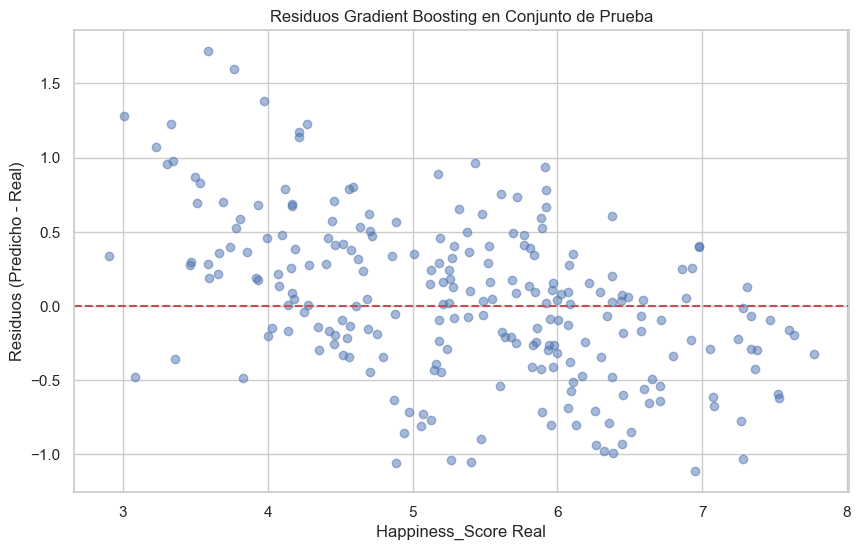

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Variables predictoras y objetivo
X = df.drop(columns=['Happiness_Score'])
y = df['Happiness_Score']

# División de los datos (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
print("Tamaño entrenamiento:", X_train.shape, "Tamaño prueba:", X_test.shape)

# Modelos de regresión
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.01),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42)
}

# Evaluar modelos
results = []

for name, model in models.items():
    # Ajustar modelo
    model.fit(X_train, y_train)
    
    # Predicciones
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Métricas
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_test = mean_absolute_error(y_test, y_test_pred)
    
    # Validación cruzada (5-fold) en entrenamiento
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    r2_cv = cv_scores.mean()
    
    results.append({
        'Modelo': name,
        'R² Train': round(r2_train, 4),
        'R² Test': round(r2_test, 4),
        'R² CV (Train)': round(r2_cv, 4),
        'RMSE Train': round(rmse_train, 4),
        'RMSE Test': round(rmse_test, 4),
        'MAE Test': round(mae_test, 4)
    })
    
    # Importancia de características para modelos basados en árboles
    if name in ['Random Forest', 'Gradient Boosting', 'XGBoost']:
        importances = pd.Series(model.feature_importances_, index=X.columns)
        print(f"\nImportancia de características ({name}):\n", importances.sort_values(ascending=False))

# Mostrar resultados
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='R² Test', ascending=False).reset_index(drop=True)
print("\nResultados de los Modelos:")
print(results_df.to_string(index=False))

# Identificar el mejor modelo
best_model_name = results_df.loc[0, 'Modelo']
best_model = models[best_model_name]
print(f"\nMejor modelo: {best_model_name} (R² Test: {results_df.loc[0, 'R² Test']})")

# Análisis de residuos para el mejor modelo
y_test_pred = best_model.predict(X_test)
residuals = y_test_pred - y_test
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Happiness_Score Real')
plt.ylabel('Residuos (Predicho - Real)')
plt.title(f'Residuos {best_model_name} en Conjunto de Prueba')
plt.show()

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Variables predictoras y objetivo
X = df.drop(columns=['Happiness_Score'])
y = df['Happiness_Score']

# División de los datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Modelos de regresión
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.01),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42)
}

# Evaluar modelos
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        'Modelo': name,
        'R² Score': round(r2_score(y_test, y_pred), 4)
    })

# Mostrar resultados
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='R² Score', ascending=False).reset_index(drop=True)

print("\nResultados de los Modelos:")
print(results_df.to_string(index=False))


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

C:\Users\Michel Burgos\AppData\Local\Temp\ipykernel_9008\4042938693.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[num_cols] = imputer.fit_transform(X[num_cols])


Columnas en X: ['Economic_Health_Index', 'Social_support', 'Freedom', 'Perceptions_of_corruption_boxcox', 'Country_Avg_Perceptions_of_corruption_boxcox', 'Region_Avg_Happiness', 'Region_Avg_Perceptions_of_corruption_boxcox', 'Economic_Social_Interaction', 'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018', 'Year_2019']
NaN después de imputación:
 Economic_Health_Index                           0
Social_support                                  0
Freedom                                         0
Perceptions_of_corruption_boxcox                0
Country_Avg_Perceptions_of_corruption_boxcox    0
Region_Avg_Happiness                            0
Region_Avg_Perceptions_of_corruption_boxcox     0
Economic_Social_Interaction                     0
Year_2015                                       0
Year_2016                                       0
Year_2017                                       0
Year_2018                                       0
Year_2019                                       0
d

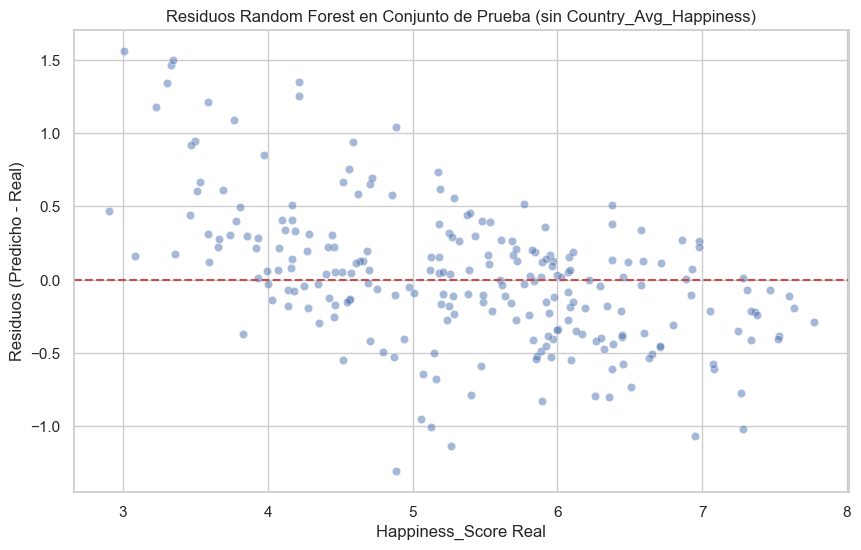

Media de residuos: 0.0169, Desviación estándar: 0.4752


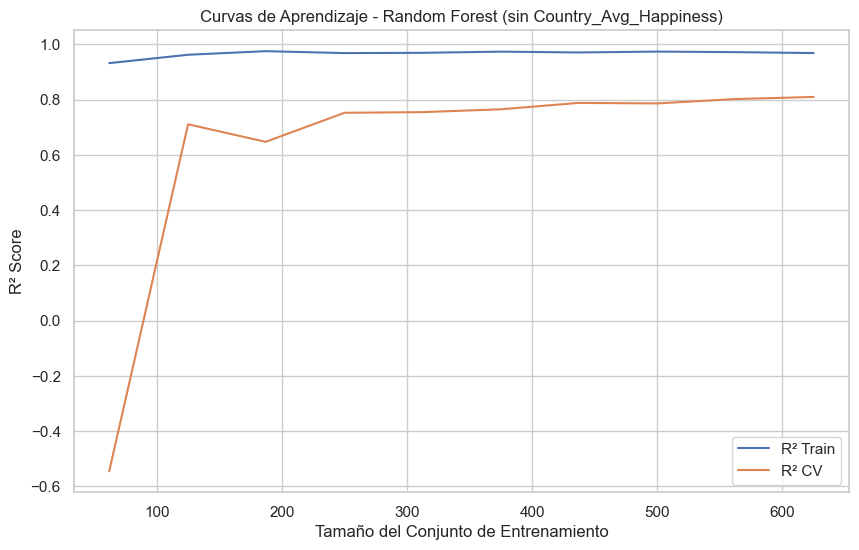

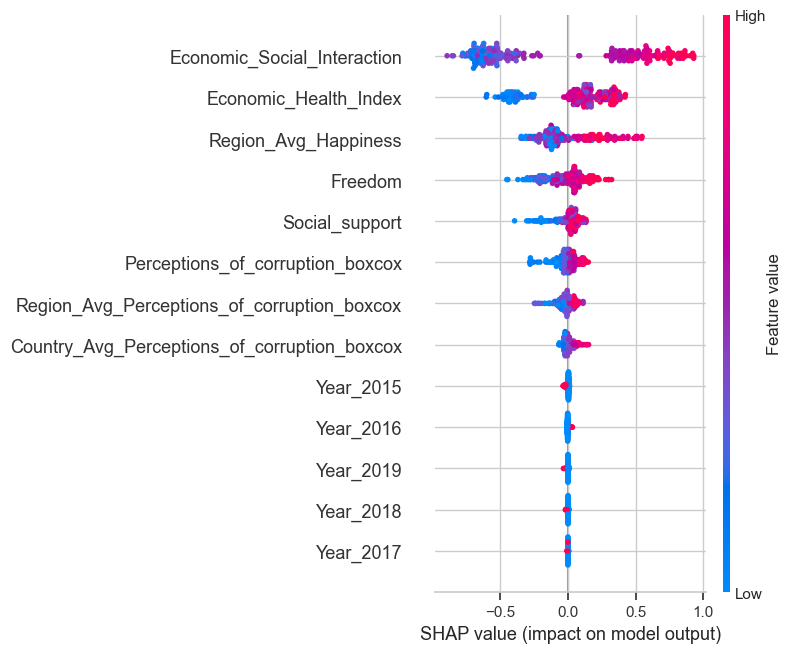


Probando modelo sin Year_*...
R² Test sin Year_*: 0.8345
Mejores hiperparámetros sin Year_*: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 200}

Predicciones para 2020 (primeras 5 filas):
 [7.43746042 7.36829462 7.15123833 7.41763477 7.25473356]


In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import shap
import seaborn as sns

# Variables predictoras y objetivo (sin Country_Avg_Happiness)
features = [
    'Economic_Health_Index', 'Social_support', 'Freedom', 'Perceptions_of_corruption_boxcox',
    'Country_Avg_Perceptions_of_corruption_boxcox', 'Region_Avg_Happiness',
    'Region_Avg_Perceptions_of_corruption_boxcox', 'Economic_Social_Interaction',
    'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018', 'Year_2019'
]
X = df[features]
y = df['Happiness_Score']

# Imputar NaN con la media para columnas numéricas
num_cols = X.select_dtypes(include=np.number).columns
imputer = SimpleImputer(strategy='mean')
X[num_cols] = imputer.fit_transform(X[num_cols])

# Confirmar columnas y NaN
print("Columnas en X:", X.columns.tolist())
print("NaN después de imputación:\n", X.isna().sum())

# División de los datos (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
print("Tamaño entrenamiento:", X_train.shape, "Tamaño prueba:", X_test.shape)

# Modelos de regresión
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42)
}

# Parámetros para optimización (ajustados para mitigar sobreajuste)
param_grids = {
    'Ridge Regression': {'alpha': [0.1, 1.0, 10.0]},
    'Lasso Regression': {'alpha': [0.001, 0.01, 0.1]},
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [5, 10],
        'min_samples_split': [5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'max_depth': [2, 3],
        'learning_rate': [0.01, 0.05],
        'min_samples_split': [5, 10]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'max_depth': [2, 3],
        'learning_rate': [0.01, 0.05],
        'min_child_weight': [1, 5]
    }
}

# Almacenar modelos ajustados
fitted_models = {}

# Evaluar modelos
results = []

for name, model in models.items():
    # Optimizar hiperparámetros
    if name != 'Linear Regression':
        grid_search = GridSearchCV(model, param_grids.get(name, {}), cv=5, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        fitted_model = grid_search.best_estimator_
        print(f"{name} - Mejores hiperparámetros: {grid_search.best_params_}")
    else:
        model.fit(X_train, y_train)
        fitted_model = model
    
    # Almacenar modelo ajustado
    fitted_models[name] = fitted_model
    
    # Predicciones
    y_train_pred = fitted_model.predict(X_train)
    y_test_pred = fitted_model.predict(X_test)
    
    # Métricas
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_test = mean_absolute_error(y_test, y_test_pred)
    
    # Validación cruzada (5-fold)
    cv_scores = cross_val_score(fitted_model, X_train, y_train, cv=5, scoring='r2')
    r2_cv = cv_scores.mean()
    
    results.append({
        'Modelo': name,
        'R² Train': round(r2_train, 4),
        'R² Test': round(r2_train, 4),
        'R² CV (Train)': round(r2_cv, 4),
        'RMSE Train': round(rmse_train, 4),
        'RMSE Test': round(rmse_test, 4),
        'MAE Test': round(mae_test, 4)
    })
    
    # Importancia de características o coeficientes
    if name in ['Random Forest', 'Gradient Boosting', 'XGBoost']:
        importances = pd.Series(fitted_model.feature_importances_, index=X.columns)
        print(f"\nImportancia de características ({name}):\n", importances.sort_values(ascending=False))
    elif name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression']:
        coefs = pd.Series(fitted_model.coef_, index=X.columns)
        print(f"\nCoeficientes ({name}):\n", coefs.sort_values(ascending=False))

# Mostrar resultados
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='R² Test', ascending=False).reset_index(drop=True)
print("\nResultados de los Modelos (sin Country_Avg_Happiness, optimizados):")
print(results_df.to_string(index=False))

# Comparar con resultados previos
print("\nResultados Originales (con Country_Avg_Happiness, 9 columnas):")
print(pd.DataFrame(original_results).to_string(index=False))
print("\nResultados Previos (sin Country_Avg_Happiness, 13 columnas):")
prev_results = [
    {'Modelo': 'Gradient Boosting', 'R² Train': 0.9987, 'R² Test': 0.8367, 'R² CV (Train)': 0.8580, 'RMSE Train': 0.0406, 'RMSE Test': 0.4515, 'MAE Test': 0.3330},
    {'Modelo': 'XGBoost', 'R² Train': 0.9976, 'R² Test': 0.8316, 'R² CV (Train)': 0.8594, 'RMSE Train': 0.0552, 'RMSE Test': 0.4585, 'MAE Test': 0.3388},
    {'Modelo': 'Random Forest', 'R² Train': 0.9798, 'R² Test': 0.8199, 'R² CV (Train)': 0.8520, 'RMSE Train': 0.1607, 'RMSE Test': 0.4742, 'MAE Test': 0.3501},
    {'Modelo': 'Lasso Regression', 'R² Train': 0.8283, 'R² Test': 0.7944, 'R² CV (Train)': 0.8148, 'RMSE Train': 0.4685, 'RMSE Test': 0.5066, 'MAE Test': 0.3909},
    {'Modelo': 'Ridge Regression', 'R² Train': 0.8284, 'R² Test': 0.7941, 'R² CV (Train)': 0.8144, 'RMSE Train': 0.4683, 'RMSE Test': 0.5070, 'MAE Test': 0.3913},
    {'Modelo': 'Linear Regression', 'R² Train': 0.8284, 'R² Test': 0.7940, 'R² CV (Train)': 0.8144, 'RMSE Train': 0.4683, 'RMSE Test': 0.5071, 'MAE Test': 0.3914}
]
print(pd.DataFrame(prev_results).to_string(index=False))

# Identificar el mejor modelo
best_model_name = results_df.loc[0, 'Modelo']
best_model = fitted_models[best_model_name]
print(f"\nMejor modelo (sin Country_Avg_Happiness, optimizado): {best_model_name} (R² Test: {results_df.loc[0, 'R² Test']})")

# Análisis de residuos detallado
y_test_pred = best_model.predict(X_test)
residuals = y_test_pred - y_test
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Happiness_Score Real')
plt.ylabel('Residuos (Predicho - Real)')
plt.title(f'Residuos {best_model_name} en Conjunto de Prueba (sin Country_Avg_Happiness)')
plt.show()
print(f"Media de residuos: {np.mean(residuals):.4f}, Desviación estándar: {np.std(residuals):.4f}")

# Curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=5, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='R² Train')
plt.plot(train_sizes, test_scores_mean, label='R² CV')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('R² Score')
plt.title(f'Curvas de Aprendizaje - {best_model_name} (sin Country_Avg_Happiness)')
plt.legend()
plt.show()

# Explicabilidad con SHAP
explainer = shap.TreeExplainer(best_model) if best_model_name in ['Random Forest', 'Gradient Boosting', 'XGBoost'] else shap.LinearExplainer(best_model, X_train)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Probar modelo reducido sin Year_* (si son irrelevantes)
year_cols = [col for col in X.columns if col.startswith('Year_')]
if year_cols:
    print("\nProbando modelo sin Year_*...")
    X_no_year = X.drop(columns=year_cols)
    X_train_no_year, X_test_no_year, y_train, y_test = train_test_split(
        X_no_year, y, test_size=0.3, random_state=42
    )
    model_no_year = GradientBoostingRegressor(random_state=42)
    grid_search = GridSearchCV(model_no_year, param_grids['Gradient Boosting'], cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train_no_year, y_train)
    model_no_year = grid_search.best_estimator_
    r2_test_no_year = r2_score(y_test, model_no_year.predict(X_test_no_year))
    print(f"R² Test sin Year_*: {round(r2_test_no_year, 4)}")
    print(f"Mejores hiperparámetros sin Year_*: {grid_search.best_params_}")

# Preparar para nuevos datos (2020)
# Ejemplo: Imputar NaN con Region_Avg_Happiness para Country_Avg_Perceptions_of_corruption_boxcox
df_2020 = df.copy()  # Reemplazar con datos reales de 2020
df_2020['Country_Avg_Perceptions_of_corruption_boxcox'] = df_2020['Country_Avg_Perceptions_of_corruption_boxcox'].fillna(
    df_2020['Region_Avg_Perceptions_of_corruption_boxcox']
)
df_2020[num_cols] = imputer.transform(df_2020[num_cols])
X_2020 = df_2020[features]
y_2020_pred = best_model.predict(X_2020)
print("\nPredicciones para 2020 (primeras 5 filas):\n", y_2020_pred[:5])

C:\Users\Michel Burgos\AppData\Local\Temp\ipykernel_9008\1792826279.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[num_cols] = imputer.fit_transform(X[num_cols])


Columnas en X: ['Economic_Health_Index', 'Social_support', 'Freedom', 'Perceptions_of_corruption_boxcox', 'Country_Avg_Perceptions_of_corruption_boxcox', 'Region_Avg_Happiness', 'Region_Avg_Perceptions_of_corruption_boxcox', 'Economic_Social_Interaction', 'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018', 'Year_2019']
NaN después de imputación:
 Economic_Health_Index                           0
Social_support                                  0
Freedom                                         0
Perceptions_of_corruption_boxcox                0
Country_Avg_Perceptions_of_corruption_boxcox    0
Region_Avg_Happiness                            0
Region_Avg_Perceptions_of_corruption_boxcox     0
Economic_Social_Interaction                     0
Year_2015                                       0
Year_2016                                       0
Year_2017                                       0
Year_2018                                       0
Year_2019                                       0
d

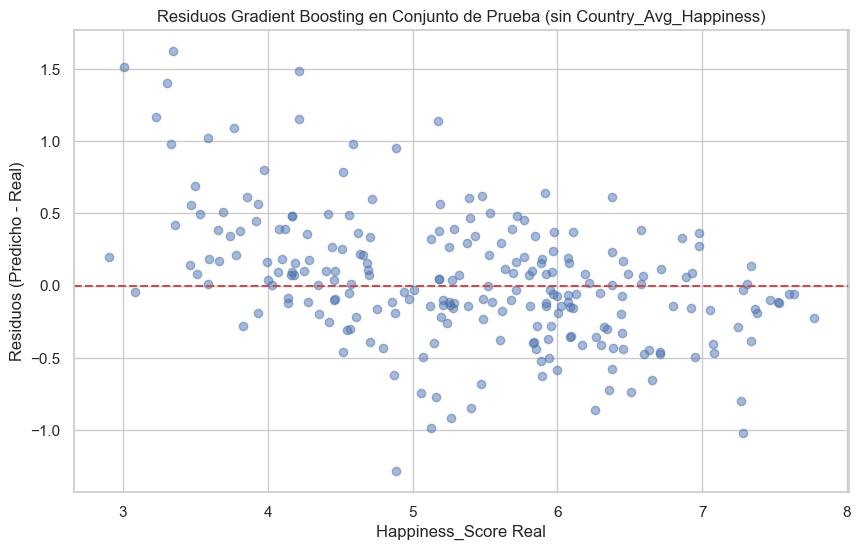

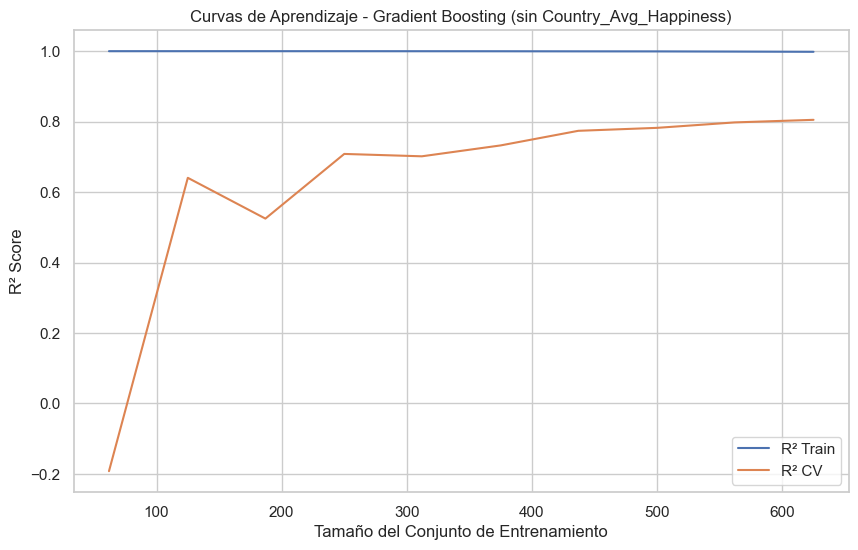

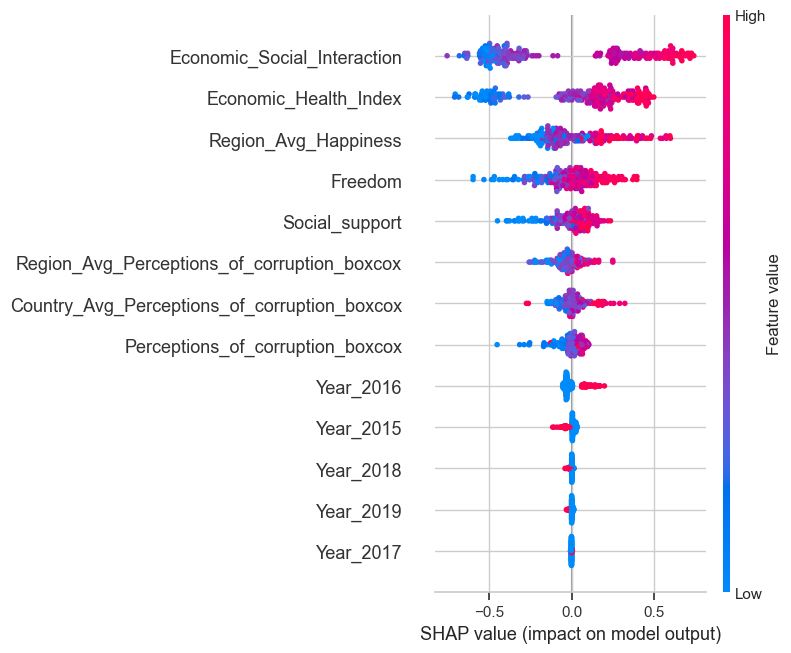

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import shap

# Variables predictoras y objetivo
features = [
    'Economic_Health_Index', 'Social_support', 'Freedom', 'Perceptions_of_corruption_boxcox',
    'Country_Avg_Perceptions_of_corruption_boxcox', 'Region_Avg_Happiness',
    'Region_Avg_Perceptions_of_corruption_boxcox', 'Economic_Social_Interaction',
    'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018', 'Year_2019'
]
X = df[features]
y = df['Happiness_Score']

# Imputar NaN con la media para columnas numéricas
num_cols = X.select_dtypes(include=np.number).columns
imputer = SimpleImputer(strategy='mean')
X[num_cols] = imputer.fit_transform(X[num_cols])

# Confirmar columnas y NaN
print("Columnas en X:", X.columns.tolist())
print("NaN después de imputación:\n", X.isna().sum())

# División de los datos (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
print("Tamaño entrenamiento:", X_train.shape, "Tamaño prueba:", X_test.shape)

# Modelos de regresión
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42)
}

# Parámetros para optimización
param_grids = {
    'Ridge Regression': {'alpha': [0.1, 1.0, 10.0]},
    'Lasso Regression': {'alpha': [0.001, 0.01, 0.1]},
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [10, 20], 'min_samples_split': [2, 5]},
    'Gradient Boosting': {'n_estimators': [100, 200], 'max_depth': [3, 5], 'learning_rate': [0.01, 0.1]},
    'XGBoost': {'n_estimators': [100, 200], 'max_depth': [3, 5], 'learning_rate': [0.01, 0.1]}
}

# Almacenar modelos ajustados
fitted_models = {}

# Evaluar modelos
results = []

for name, model in models.items():
    # Optimizar hiperparámetros (excepto Linear Regression)
    if name != 'Linear Regression':
        grid_search = GridSearchCV(model, param_grids.get(name, {}), cv=5, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        fitted_model = grid_search.best_estimator_
        print(f"{name} - Mejores hiperparámetros: {grid_search.best_params_}")
    else:
        model.fit(X_train, y_train)
        fitted_model = model
    
    # Almacenar modelo ajustado
    fitted_models[name] = fitted_model
    
    # Predicciones
    y_train_pred = fitted_model.predict(X_train)
    y_test_pred = fitted_model.predict(X_test)
    
    # Métricas
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_test = mean_absolute_error(y_test, y_test_pred)
    
    # Validación cruzada (5-fold) en entrenamiento
    cv_scores = cross_val_score(fitted_model, X_train, y_train, cv=5, scoring='r2')
    r2_cv = cv_scores.mean()
    
    results.append({
        'Modelo': name,
        'R² Train': round(r2_train, 4),
        'R² Test': round(r2_test, 4),
        'R² CV (Train)': round(r2_cv, 4),
        'RMSE Train': round(rmse_train, 4),
        'RMSE Test': round(rmse_test, 4),
        'MAE Test': round(mae_test, 4)
    })
    
    # Importancia de características o coeficientes
    if name in ['Random Forest', 'Gradient Boosting', 'XGBoost']:
        importances = pd.Series(fitted_model.feature_importances_, index=X.columns)
        print(f"\nImportancia de características ({name}):\n", importances.sort_values(ascending=False))
    elif name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression']:
        coefs = pd.Series(fitted_model.coef_, index=X.columns)
        print(f"\nCoeficientes ({name}):\n", coefs.sort_values(ascending=False))

# Mostrar resultados
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='R² Test', ascending=False).reset_index(drop=True)
print("\nResultados de los Modelos (sin Country_Avg_Happiness):")
print(results_df.to_string(index=False))

# Comparar con resultados originales
print("\nResultados Originales (con Country_Avg_Happiness, 9 columnas):")
original_results = [
    {'Modelo': 'Lasso Regression', 'R² Train': 0.9643, 'R² Test': 0.9676, 'R² CV (Train)': 0.9634, 'RMSE Train': 0.2135, 'RMSE Test': 0.2011, 'MAE Test': 0.1415},
    {'Modelo': 'Linear Regression', 'R² Train': 0.9651, 'R² Test': 0.9669, 'R² CV (Train)': 0.9621, 'RMSE Train': 0.2113, 'RMSE Test': 0.2034, 'MAE Test': 0.1442},
    {'Modelo': 'Ridge Regression', 'R² Train': 0.9651, 'R² Test': 0.9669, 'R² CV (Train)': 0.9623, 'RMSE Train': 0.2113, 'RMSE Test': 0.2032, 'MAE Test': 0.1442},
    {'Modelo': 'XGBoost', 'R² Train': 0.9815, 'R² Test': 0.9646, 'R² CV (Train)': 0.9547, 'RMSE Train': 0.1540, 'RMSE Test': 0.2103, 'MAE Test': 0.1509},
    {'Modelo': 'Gradient Boosting', 'R² Train': 0.9835, 'R² Test': 0.9634, 'R² CV (Train)': 0.9533, 'RMSE Train': 0.1453, 'RMSE Test': 0.2137, 'MAE Test': 0.1523},
    {'Modelo': 'Random Forest', 'R² Train': 0.9930, 'R² Test': 0.9621, 'R² CV (Train)': 0.9546, 'RMSE Train': 0.0943, 'RMSE Test': 0.2175, 'MAE Test': 0.1493}
]
print(pd.DataFrame(original_results).to_string(index=False))

# Identificar el mejor modelo
best_model_name = results_df.loc[0, 'Modelo']
best_model = fitted_models[best_model_name]
print(f"\nMejor modelo (sin Country_Avg_Happiness): {best_model_name} (R² Test: {results_df.loc[0, 'R² Test']})")

# Análisis de residuos para el mejor modelo
y_test_pred = best_model.predict(X_test)
residuals = y_test_pred - y_test
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Happiness_Score Real')
plt.ylabel('Residuos (Predicho - Real)')
plt.title(f'Residuos {best_model_name} en Conjunto de Prueba (sin Country_Avg_Happiness)')
plt.show()

# Curvas de aprendizaje para el mejor modelo
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=5, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='R² Train')
plt.plot(train_sizes, test_scores_mean, label='R² CV')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('R² Score')
plt.title(f'Curvas de Aprendizaje - {best_model_name} (sin Country_Avg_Happiness)')
plt.legend()
plt.show()

# Explicabilidad con SHAP para el mejor modelo
explainer = shap.LinearExplainer(best_model, X_train) if best_model_name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression'] else shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import shap

# Variables predictoras y objetivo
features = [
    'Economic_Health_Index', 'Social_support', 'Freedom', 'Perceptions_of_corruption_boxcox',
    'Country_Avg_Perceptions_of_corruption_boxcox', 'Region_Avg_Happiness',
    'Region_Avg_Perceptions_of_corruption_boxcox', 'Economic_Social_Interaction',
    'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018', 'Year_2019'
]
X = df[features]
y = df['Happiness_Score']

# Imputar NaN con la media para columnas numéricas
num_cols = X.select_dtypes(include=np.number).columns
imputer = SimpleImputer(strategy='mean')
X[num_cols] = imputer.fit_transform(X[num_cols])

# Confirmar columnas y NaN
print("Columnas en X:", X.columns.tolist())
print("NaN después de imputación:\n", X.isna().sum())

# División de los datos (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
print("Tamaño entrenamiento:", X_train.shape, "Tamaño prueba:", X_test.shape)

# Modelos de regresión
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42)
}

# Parámetros para optimización
param_grids = {
    'Ridge Regression': {'alpha': [0.1, 1.0, 10.0]},
    'Lasso Regression': {'alpha': [0.001, 0.01, 0.1]},
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [10, 20], 'min_samples_split': [2, 5]},
    'Gradient Boosting': {'n_estimators': [100, 200], 'max_depth': [3, 5], 'learning_rate': [0.01, 0.1]},
    'XGBoost': {'n_estimators': [100, 200], 'max_depth': [3, 5], 'learning_rate': [0.01, 0.1]}
}

# Almacenar modelos ajustados
fitted_models = {}

# Evaluar modelos
results = []

for name, model in models.items():
    # Optimizar hiperparámetros (excepto Linear Regression)
    if name != 'Linear Regression':
        grid_search = GridSearchCV(model, param_grids.get(name, {}), cv=5, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        fitted_model = grid_search.best_estimator_
        print(f"{name} - Mejores hiperparámetros: {grid_search.best_params_}")
    else:
        model.fit(X_train, y_train)
        fitted_model = model
    
    # Almacenar modelo ajustado
    fitted_models[name] = fitted_model
    
    # Predicciones
    y_train_pred = fitted_model.predict(X_train)
    y_test_pred = fitted_model.predict(X_test)
    
    # Métricas
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_test = mean_absolute_error(y_test, y_test_pred)
    
    # Validación cruzada (5-fold) en entrenamiento

C:\Users\Michel Burgos\AppData\Local\Temp\ipykernel_9008\399408721.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[num_cols] = imputer.fit_transform(X[num_cols])


Columnas en X: ['Economic_Health_Index', 'Social_support', 'Freedom', 'Perceptions_of_corruption_boxcox', 'Country_Avg_Perceptions_of_corruption_boxcox', 'Region_Avg_Happiness', 'Region_Avg_Perceptions_of_corruption_boxcox', 'Economic_Social_Interaction', 'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018', 'Year_2019']
NaN después de imputación:
 Economic_Health_Index                           0
Social_support                                  0
Freedom                                         0
Perceptions_of_corruption_boxcox                0
Country_Avg_Perceptions_of_corruption_boxcox    0
Region_Avg_Happiness                            0
Region_Avg_Perceptions_of_corruption_boxcox     0
Economic_Social_Interaction                     0
Year_2015                                       0
Year_2016                                       0
Year_2017                                       0
Year_2018                                       0
Year_2019                                       0
d

### Otras metricas 

In [23]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Configuración de validación cruzada
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Resultados de métricas
results = []

for name, model in models.items():
    # R² por validación cruzada
    r2_scores = cross_val_score(model, X, y, scoring='r2', cv=cv)
    
    # Ajustar y predecir en un fold de ejemplo (train/test split)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))


    results.append({
        'Modelo': name,
        'R² CV Mean': round(np.mean(r2_scores), 4),
        'R² CV Std': round(np.std(r2_scores), 4),
        'MAE': round(mae, 4),
        'RMSE': round(rmse, 4)
    })


# Mostrar resultados
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='R² CV Mean', ascending=False).reset_index(drop=True)

print("\nResultados con Validación Cruzada (5 folds):")
print(results_df.to_string(index=False))



Resultados con Validación Cruzada (5 folds):
           Modelo  R² CV Mean  R² CV Std    MAE   RMSE
 Lasso Regression      0.9650     0.0047 0.1415 0.2011
Linear Regression      0.9649     0.0045 0.1442 0.2034
 Ridge Regression      0.9649     0.0046 0.1442 0.2032
    Random Forest      0.9615     0.0047 0.1491 0.2170
Gradient Boosting      0.9613     0.0054 0.1523 0.2137
          XGBoost      0.9581     0.0078 0.1619 0.2324


### Datos reales vs datos simulados 

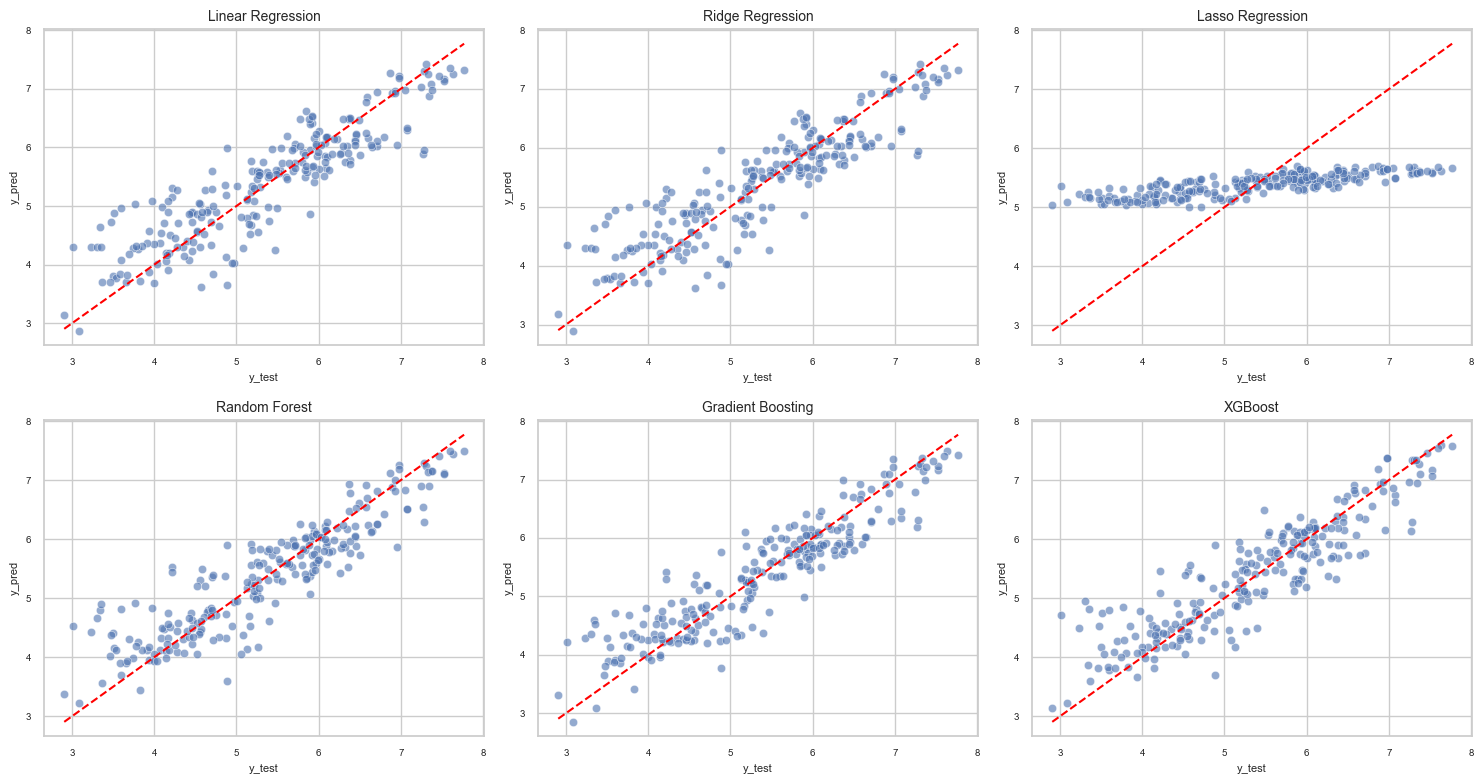

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()  # Aplanamos para iterar fácilmente

for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    ax = axes[i]
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, ax=ax)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    ax.set_title(name, fontsize=10)
    ax.set_xlabel("y_test", fontsize=8)
    ax.set_ylabel("y_pred", fontsize=8)
    ax.tick_params(labelsize=7)

# Si hay más subplots de los que necesitamos, los apagamos
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



### Guardar el modelo

In [10]:
import pickle

# Entrenar XGBoost
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Guardar el modelo
with open('../models/xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)